- 회귀는 여러 개의 독립변수(feature)와 한 개의 종속변수(label) 간의 상관관계를 모델링하는 기법을 통칭한다.

- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.

```
     독립 변수 개수       |     회귀 계수의 결합
     ----------------------------------------
     1개 : 단일 회귀      |   선형 : 선형 회귀
     여러 개 : 다중 회귀   |  비선형 : 비선형 회귀
```

### 단순선형회귀

<img src='./img/LinearR.jpg' width='320' height='236' border='2'>

#### $RSS (w_{0}, w_{1}) = R(w) = \dfrac{1}{N}\textstyle\sum_{i=1}^N(y_{i}-(w_{0}+w_{1}*x_{i}))^{2}$

이 RSS를 최소로 하는 $w_{0}, w_{1}$ 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심사항

### 경사 하강법(Gradient descent)

1. W 파라미터가 많을 경우에는 고차원 방정식을 이용해야하고, 이를 푸는 것도 현실적이지가 않기 때문에 경사 하강법을 이용한다.

2. 경사 하강법은 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식

3. '데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나

위의 비용 함수를 $w_{0}$와 $w_{1}$로 편미분하여 새로운 값으로 계속 업데이트 해준다.

#### $new\_w_{0} = old\_w_{0} + \eta\dfrac{2}{N}\textstyle\sum_{i=1}^N(실제값_{i} - 예측값_{i})$

#### $new\_w_{1} = old\_w_{1} + \eta\dfrac{2}{N}\textstyle\sum_{i=1}^N x_{i}*(실제값_{i} - 예측값_{i})$

#### $R(w) = \dfrac{1}{N}\textstyle\sum_{i=1}^N(y_{i}-(new\_w_{0}+new\_w_{1}*x_{i}))^{2}$

더 이상 비용함수의 값이 감소하지 않으면 그때의 $w_{0}$, $w_{1}$ 값을 구하고 반복을 중지함

### 경사하강법 구현

간단한 회귀 식인 $y = 4x + 6$을 근사하기 위한 100개의 데이터 세트를 만들고 경사 하강법을 이용해 $w_{0}$와 $w_{1}$을 도출

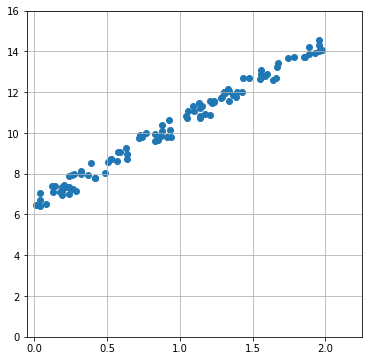

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# y = 4x + 6을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4*X + np.random.rand(100,1)

plt.figure(figsize=(6, 6), facecolor='white')
plt.scatter(X, y)
plt.xlim([-0.05, 2.25]); plt.ylim([0,16])
plt.grid()
plt.show()

---

In [3]:
## 비용함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

#### gradient_descent 함수

1. $w_{0}$와 $w_{1}$을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 $w_{0}$와 $w_{1}$를 업데이트

2. 위에서 무작위로 생성된 x, y를 입력으로 받음. 이 X, y는 모두 넘파이 ndarray

#### get_weight_update 함수

1. 100개의 데이터 X(1, 2, ..., 100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 + ... + X(100)w1 이고, 이는 다음과 같이 계산 가능

2. y_pred = np.dot(X, w1.T) + w0

3. 반환 값은 업데이트 된 가중치인 w1_update, w0_update

In [4]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01) -> 'ndarray':
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

#### gradient_descent_steps 함수

get_weight_updates를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수

In [5]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

w1: 4.028 , w0: 6.490
Gradient Descent Total Cost : 0.0775


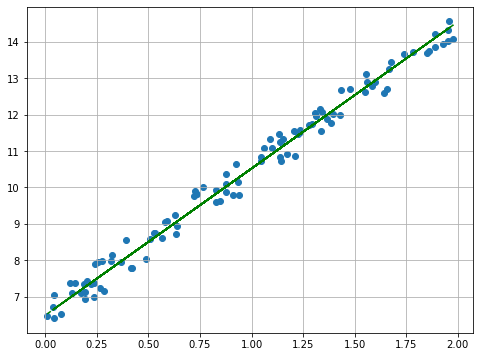

In [6]:
### 학습
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f'w1: {w1[0,0]:.3f} , w0: {w0[0,0]:.3f}')

y_pred = w1[0,0]*X + w0
print(f'Gradient Descent Total Cost : {get_cost(y, y_pred):.4f}')

plt.figure(figsize=(8,6), facecolor='white')
plt.scatter(X, y)
plt.plot(X, y_pred, 'g--')
plt.grid()
plt.show()

---

### 보스턴 주택 가격 회귀 구현 (305p)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df['PRICE'] = boston.target
print(f'Boston 데이터 세트 크기 : {boston_df.shape}')
boston_df.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


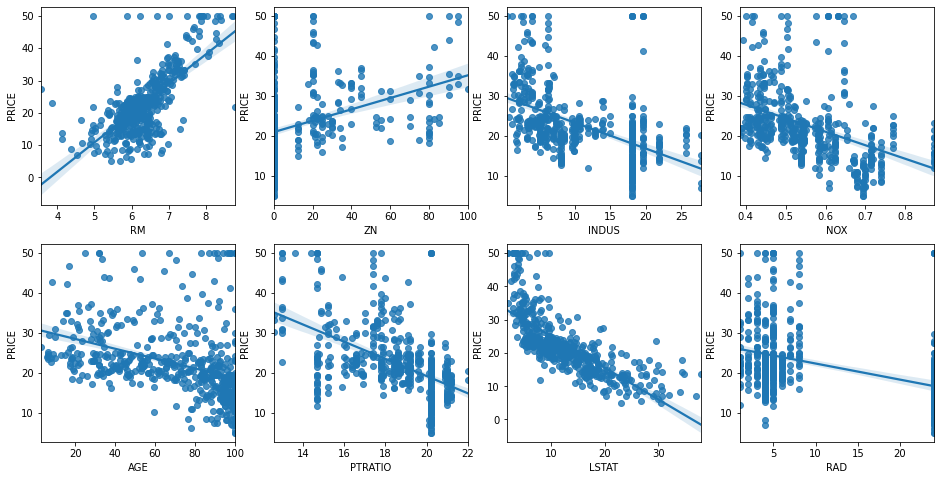

In [9]:
fig, ax = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for idx, feature in enumerate(lm_features):
    row = idx//4
    col = idx%4
    
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=ax[row][col])

### 회귀 모델

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = boston.data
y = boston.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# 선형 회귀 OLS로 학습/예측/평가
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_val)

mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} , RMSE : {rmse:.3f}')
print(f'Varience score : {r2_score(y_val, pred):.3f}')

MSE : 27.196 , RMSE : 5.215
Varience score : 0.673


In [19]:
np.set_printoptions(precision=6, suppress=True)
print(f'절편 값 : {lr.intercept_}')
print('< 회귀 계수 값 >')
for feat, coef in zip(boston.feature_names, lr.coef_):
    print(f'{feat} : {coef:.3f}')

절편 값 : 37.93710774183255
< 회귀 계수 값 >
CRIM : -0.121
ZN : 0.044
INDUS : 0.011
CHAS : 2.511
NOX : -16.231
RM : 3.859
AGE : -0.010
DIS : -1.500
RAD : 0.242
TAX : -0.011
PTRATIO : -1.018
B : 0.007
LSTAT : -0.487


In [22]:
from sklearn.model_selection import cross_val_score

X = boston.data
y = boston.target

lr = LinearRegression()

# MSE , RMSE
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1*mse)
avg_rmse = np.mean(rmse)

print(f'MSE 5 folds : {np.round(mse, 3)}')
print(f'RMSE 5 folds : {np.round(rmse, 3)}')
print(f'average value of RMSE : {avg_rmse:.3f}')

MSE 5 folds : [-12.46  -26.049 -33.074 -80.762 -33.314]
RMSE 5 folds : [3.53  5.104 5.751 8.987 5.772]
average value of RMSE : 5.829


### 다항 회귀와 과대/과소 적합 이해 (311p)

[$x_{1}$, $x_{2}$]  -->  [1, $x_{1}$, $x_{2}$, $x_{1}^2$, $x_{1}$$x_{2}$, $x_{2}^2$]

단항식 -> 2차 다항식

In [23]:
from sklearn.preprocessing import PolynomialFeatures

## [[0,1], [2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('1차 단항식 계수 피처 :')
print(X)

## degree = 2 인 2차 다항식으로 변환하기 위해 PolynomailFeatures를 이용
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 :')
print(poly_ftr)

일차 단항식 계수 피처 :
[[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 :
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차

$y = 1 + 2x_{1} + 3x_{1}^2 + 4x_{2}^2$

In [24]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('1차 단항식 계수 :')
print(X)

y = polynomial_func(X)
print('3차 다항식 결정값 :')
print(y)

일차 단항식 계수 :
[[0 1]
 [2 3]]
삼차 다항식 결정값 :
[  5 125]


단항식 -> 3차 다항식

[$x_{1}$, $x_{2}$]  -->  [1, $x_{1}$, $x_{2}$, $x_{1}^2$, $x_{1}x_{2}$, $x_{2}^2$, $x_{1}^3$, $x_{1}^2x_{2}$, $x_{1}x_{2}^2$, $x_{2}^3$]

In [26]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature :')
print(poly_ftr)
print()

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수')
print(np.round(model.coef_, 2))
print()
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature :
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]

Polynomial 회귀 계수
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]

Polynomial 회귀 Shape : (10,)


#### pipeline을 이용

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model.fit(X, y)

print('Polynomial 회귀 계수')
print(np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 편향-분산 트레이드오프
Degree 1 - 지나치게 한 방향성으로 치우친 경향 : 고편향(High Bias) 성

Degree 15 - 하나의 특성을 반영하면서 매우 복잡한 모델 + 지나치게 높은 변동성 : 고분산(High Variance)성

<img src='./img/bias_variance.jpg' width=300 height=320>

**일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다.**

High Bias - Low Variance  : 과소적합

Low Bias - High Variance  : 과대적합

**-> 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.**

### 규제 선형 모델 - Rasso, Lidge, Elastic Net

회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.

1. 학습데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법
2. 회귀 계수 값이 커지지 않도록 하는 방법

위의 두 방법이 서로 균형을 맞춰야 한다.

**-> 비용 함수 목표$ = Min(RSS(W) + alpha*||W||^2_{2}$**

#### alpha

- alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있다.

- alpha 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.

    - alpha = 0 인 경우는 W가 커도 $alpha * ||W||^2_{2}$ 가 0이 되어 비용 함수는 $Min(RSS(W)$
    
    - alpha = 무한대인 경우 $alpha * ||W||^2_{2}$ 도 무한대가 되므로 비용 함수는 W를 0에 가깝게 최소화 해야 함.

#### 규제(Regularization) : 비용함수에 alpha 값으로 페널티를 부여해 회귀 계수의 크기를 감소시켜 과적합을 개선하는 방식

- L1 규제(Lasso) : $alpha * ||W||_{1}$ , 영향력이 크지 않은 회귀 계수의 값을 0으로 변환함
- L2 규제(Ridge) : $alpha * ||W||^2_{2}$ , 영향력이 크지 않은 회귀 계수의 값을 0에 가깝게 만듦